In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


In [10]:
iris_data = pd.read_csv("../input/Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


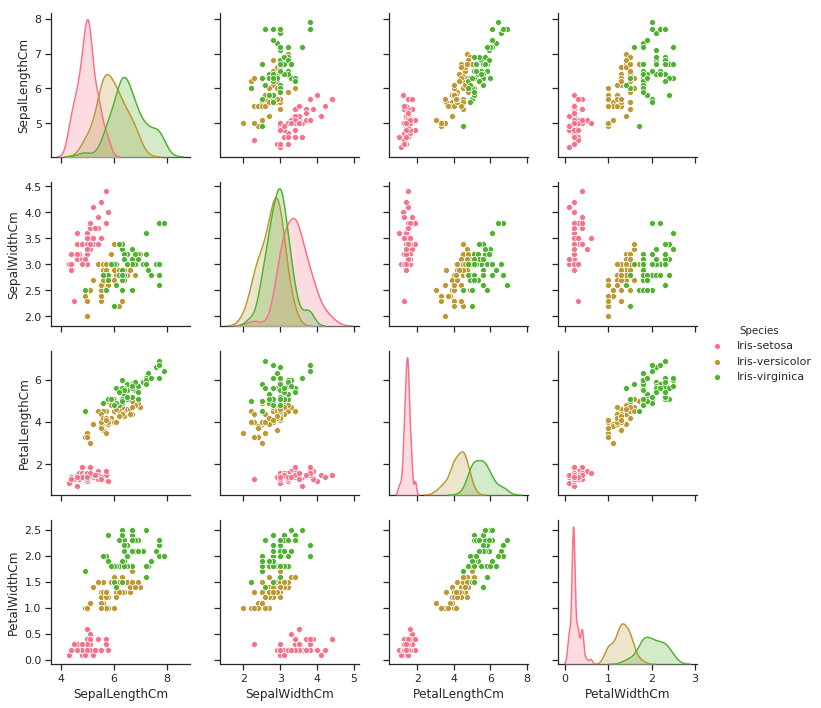

In [11]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(iris_data.iloc[:,1:6],hue="Species")

Since the labels are strings, we must encode them as integers. This gives us an array of especies encoded as 0, 1, or 2 for Iris-setosa, Iris-versicolor, or Iris-virginica respectively.

In [12]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
species_encoded=le.fit_transform(iris_data.Species)

**Main Funtion:**
Here, I create a function that runs the kNN algorithm and returns the accuracy. This is going to allow us to loop through various iterations using a different number of neighbors. From this, we can find the optimized number of neighbors for this set.

In [13]:
def run_knn(data, labels, neighbors):
    X_train, X_test, y_train, y_test = train_test_split(data,labels,random_state=7,train_size=0.7)

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

In [14]:
accuracy_list = []
for i in range(1, 51):
    accuracy = run_knn(iris_data.iloc[:, [1,2,3,4]].values, species_encoded, i)
    accuracy_list.append(accuracy)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
df = pd.DataFrame({'Accuracy':accuracy_list})

In [16]:
df['Neighbors'] = df.index + 1

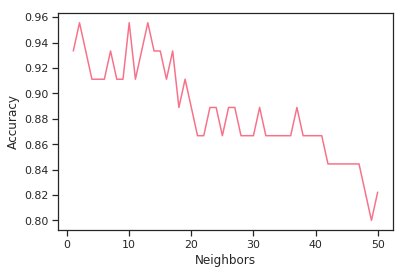

In [17]:
ax = sns.lineplot(x="Neighbors", y="Accuracy", data=df)